In [ ]:
import pandas as pd

# 2. Fazer upload do arquivo manualmente
from google.colab import files
uploaded = files.upload()  # isso vai abrir uma janelinha para voc√™ subir o CSV

df = pd.read_csv('insurance.csv')

df.head()




Saving insurance.csv to insurance (3).csv


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
contagem_regiao = df['region'].value_counts()

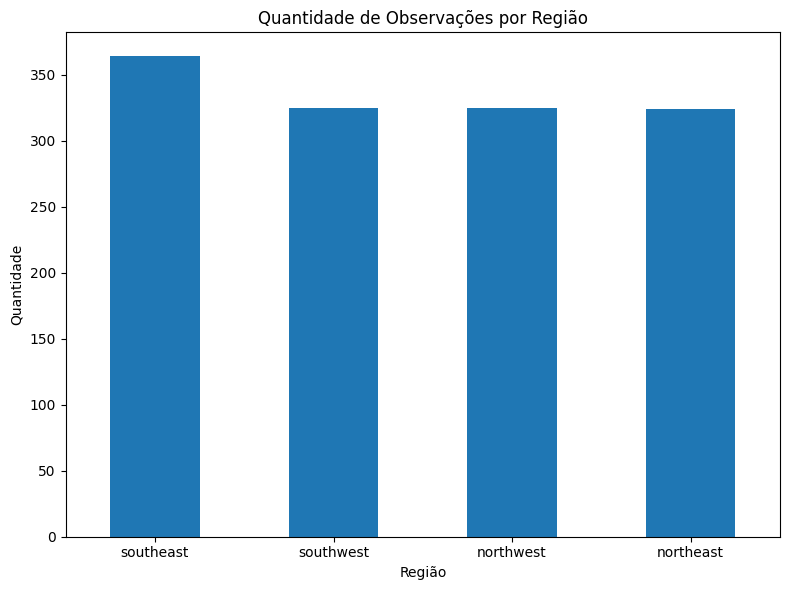

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Define o tamanho da figura
contagem_regiao.plot(kind='bar') # Cria o gr√°fico de barras
plt.title('Quantidade de Observa√ß√µes por Regi√£o') # T√≠tulo do gr√°fico
plt.xlabel('Regi√£o') # R√≥tulo do eixo X
plt.ylabel('Quantidade') # R√≥tulo do eixo Y
plt.xticks(rotation=0) # Garante que os r√≥tulos do eixo X n√£o estejam rotacionados
plt.tight_layout()  # Ajusta o layout para evitar sobreposi√ß√£o
plt.show() # Exibe o gr√°fico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


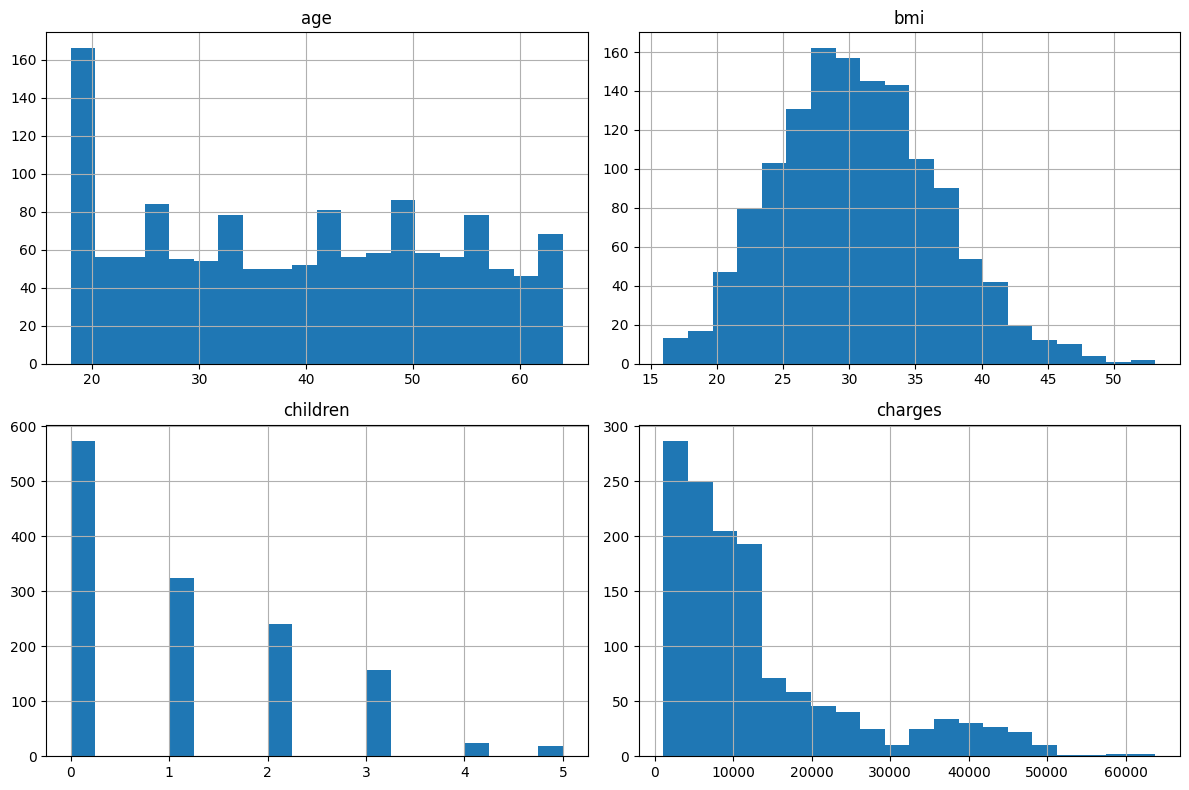

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [ ]:
# 1. Primeiras linhas
df.head()

# 2. Informa√ß√µes da base
df.info()

# 3. Estat√≠sticas b√°sicas
df.describe()

# 4. Contagem por sexo
df['sex'].value_counts()

# 5. Verificar valores nulos
df.isna().sum()

# 6. Histogramas autom√°ticos
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# 7. M√©dia de charges por status de fumante
df.groupby('smoker')['charges'].mean()


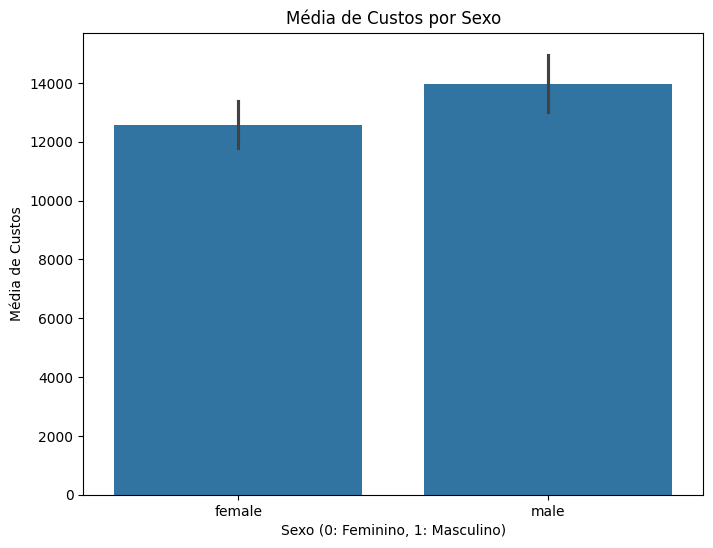

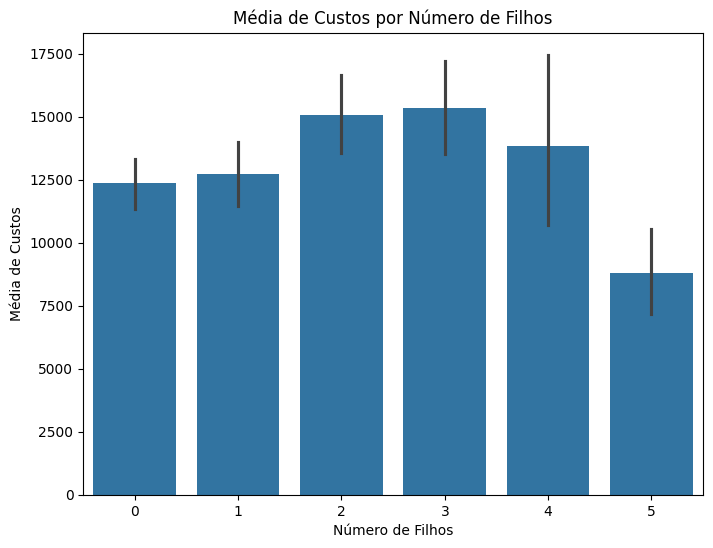

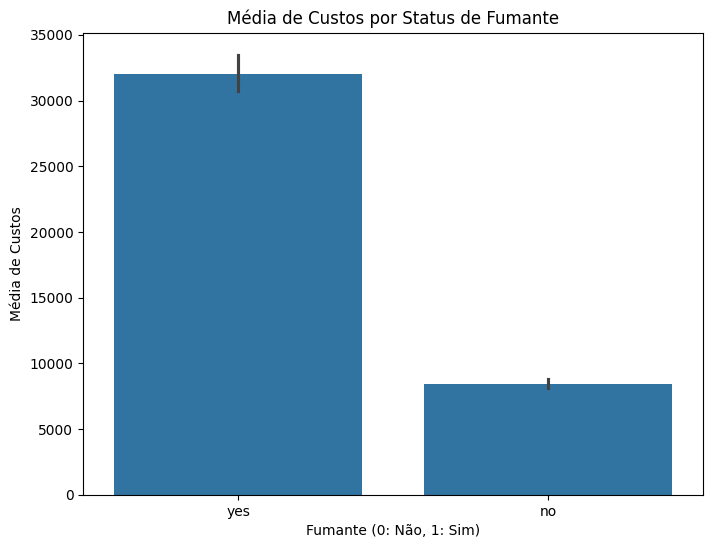

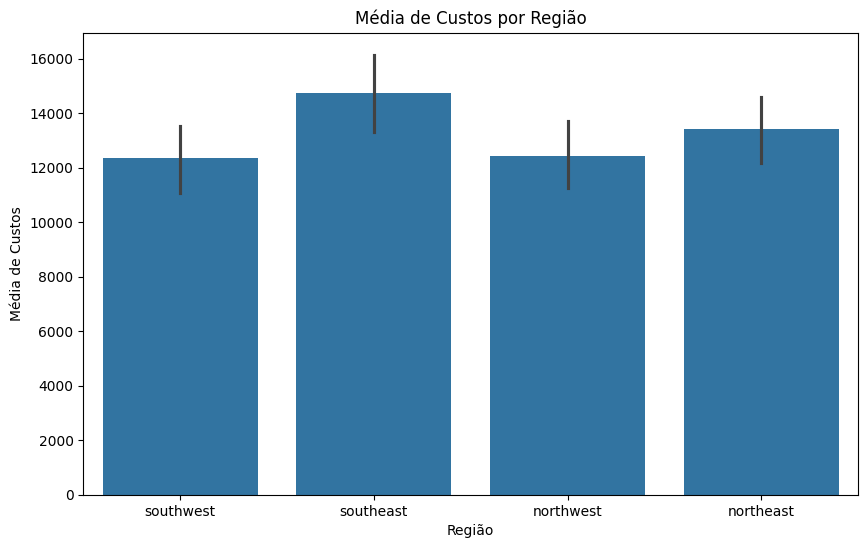

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gr√°fico de barras para a m√©dia de Charges por Sexo
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='charges', data=df)
plt.title('M√©dia de Custos por Sexo')
plt.xlabel('Sexo (0: Feminino, 1: Masculino)')
plt.ylabel('M√©dia de Custos')
plt.show()

# Gr√°fico de barras para a m√©dia de Charges por N√∫mero de Filhos
plt.figure(figsize=(8, 6))
sns.barplot(x='children', y='charges', data=df)
plt.title('M√©dia de Custos por N√∫mero de Filhos')
plt.xlabel('N√∫mero de Filhos')
plt.ylabel('M√©dia de Custos')
plt.show()

# Gr√°fico de barras para a m√©dia de Charges por Status de Fumante
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('M√©dia de Custos por Status de Fumante')
plt.xlabel('Fumante (0: N√£o, 1: Sim)')
plt.ylabel('M√©dia de Custos')
plt.show()

# Gr√°fico de barras para a m√©dia de Charges por Regi√£o
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=df)
plt.title('M√©dia de Custos por Regi√£o')
plt.xlabel('Regi√£o')
plt.ylabel('M√©dia de Custos')
plt.show()

<Axes: xlabel='charges', ylabel='Count'>

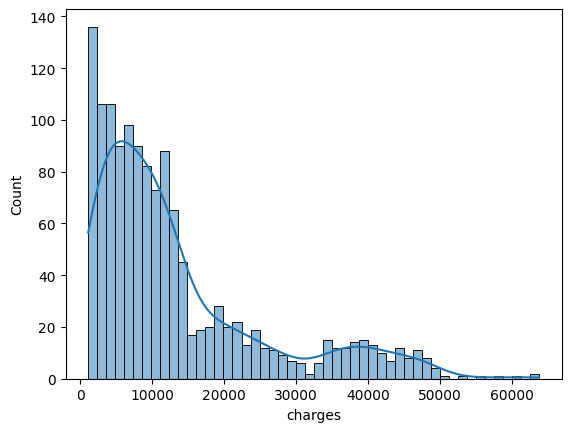

In [ ]:
import seaborn as sns
sns.histplot(df['charges'], bins=50, kde=True)


In [ ]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

df.head()


age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520

In [ ]:
df = pd.get_dummies(df, columns=['region'], drop_first=False)
df.head()

age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061             False   
4   32    1  28.880         0       0   3866.85520             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 1. Selecionar Vari√°veis
# Features (vari√°veis independentes)
X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

# Target (vari√°vel dependente)
y = df['charges']


# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Fazer previs√µes
y_pred_lr = modelo_lr.predict(X_test)

# Avaliar o modelo
print("üîπ Regress√£o Linear:")
print("R¬≤:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

üîπ Regress√£o Linear:
R¬≤: 0.7800755882073586
MAE: 4222.996246596083


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Features (vari√°veis independentes)
X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]


# Target (vari√°vel dependente)
y = df['charges']

# Criar features polinomiais
grau_polinomial = 2 # Voc√™ pode ajustar o grau do polin√¥mio
poly_features = PolynomialFeatures(degree=grau_polinomial)
X_poly = poly_features.fit_transform(X)


# Separar treino e teste
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regress√£o Polinomial
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)

# Fazer previs√µes
y_pred_poly = modelo_poly.predict(X_test_poly)

# Avaliar o modelo
print(f"üîπ Regress√£o Polinomial (Grau {grau_polinomial}):")
print("R¬≤:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))

üîπ Regress√£o Polinomial (Grau 2):
R¬≤: 0.8692975322069121
MAE: 2685.3448170096553


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Assumindo que df j√° est√° carregado e pr√©-processado conforme seu c√≥digo anterior

# Features (vari√°veis independentes)
X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]


# Target (vari√°vel dependente)
y = df['charges']

# Separar treino e teste
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de √Årvore de Decis√£o para Regress√£o
modelo_dt = DecisionTreeRegressor(random_state=42) # random_state para reprodutibilidade
modelo_dt.fit(X_train_dt, y_train_dt)

# Fazer previs√µes
y_pred_dt = modelo_dt.predict(X_test_dt)

# Avaliar o modelo
print("üîπ √Årvore de Decis√£o para Regress√£o:")
print("R¬≤:", r2_score(y_test_dt, y_pred_dt))
print("MAE:", mean_absolute_error(y_test_dt, y_pred_dt))

üîπ √Årvore de Decis√£o para Regress√£o:
R¬≤: 0.6931530273154684
MAE: 3346.800375768657


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Assumindo que df j√° est√° carregado e pr√©-processado conforme seu c√≥digo anterior

# Features (vari√°veis independentes)
X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

# Target (vari√°vel dependente)
y = df['charges']

# Separar treino e teste
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Random Forest para Regress√£o
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators √© o n√∫mero de √°rvores
modelo_rf.fit(X_train_rf, y_train_rf)

# Fazer previs√µes
y_pred_rf = modelo_rf.predict(X_test_rf)

# Avaliar o modelo
print("üîπ Random Forest para Regress√£o:")
print("R¬≤:", r2_score(y_test_rf, y_pred_rf))
print("MAE:", mean_absolute_error(y_test_rf, y_pred_rf))

üîπ Random Forest para Regress√£o:
R¬≤: 0.8683655116929723
MAE: 2470.5008867561573


#      An√°lise - Melhores resultados
***


Regress√£o Linear:	R¬≤: 0.7836	/ MAE: 4181.19 /	Colunas: age, bmi, smoker, children, region, sex

Polinomial (grau 2):	R¬≤: 0.8693	/ MAE: 2685.34	/ Colunas: age, bmi, smoker, children, region

√Årvore de Decis√£o	R¬≤: 0.7535 /	MAE: 2854.54	/ Colunas: age, bmi, smoker, children, region

Random Forest	R¬≤: 0.8683 /	MAE: 2470.50	/ Colunas: age, bmi, smoker, children, region

#Regress√£o Linear
*******


X = df[['age', 'bmi', 'smoker']]
y = df['charges']

üîπ Regress√£o Linear:
R¬≤: 0.7776932310583374
MAE: 4260.560091099392

-

X = df[['age', 'bmi', 'smoker', 'children']]
y = df['charges']

üîπ Regress√£o Linear:
R¬≤: 0.7811147722517886
MAE: 4213.798594527246

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

üîπ Regress√£o Linear:
R¬≤: 0.7835569786290856
MAE: 4182.011828516012

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']


üîπ Regress√£o Linear:
R¬≤: 0.7835929767120724
MAE: 4181.194473753638

-

X = df[['age', 'bmi', 'smoker','region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']


üîπ Regress√£o Linear:
R¬≤: 0.7800795892260536
MAE: 4222.908401655544

-

X = df[['age', 'bmi', 'smoker', 'sex']]

y = df['charges']


üîπ Regress√£o Linear:
R¬≤: 0.7776757765738431
MAE: 4260.991696434016

-

X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

üîπ Regress√£o Linear:
R¬≤: 0.7800755882073586
MAE: 4222.996246596083


****
#REGRESS√ÉO POLINOMIAL
****


X = df[['age', 'bmi', 'smoker']]
)
y = df['charges']

üîπ Regress√£o Polinomial (Grau 2):
R¬≤: 0.8611724832684049
MAE: 2841.1964029834344

-

X = df[['age', 'bmi', 'smoker', 'children']]


y = df['charges']

üîπ Regress√£o Polinomial (Grau 2):
R¬≤: 0.8670430253632888
MAE: 2773.5716510212515

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

üîπ Regress√£o Polinomial (Grau 2):
R¬≤: 0.8692975322069121
MAE: 2685.3448170096553

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']

üîπ Regress√£o Polinomial (Grau 2):
R¬≤: 0.8665830903164846
MAE: 2729.5001336394184


-

X = df[['age', 'bmi', 'smoker', 'sex']]

y = df['charges']


üîπ Regress√£o Polinomial (Grau 2):
R¬≤: 0.8669441556658776
MAE: 2783.3568052029177

-

X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

üîπ Regress√£o Polinomial (Grau 2):
R¬≤: 0.8634718819857696
MAE: 2774.5009453542843

*****
#√ÅRVORE DE DECIS√ÉO
*****


X = df[['age', 'bmi', 'smoker']]

y = df['charges']

üîπ √Årvore de Decis√£o para Regress√£o:
R¬≤: 0.7415009348241524
MAE: 3133.5445017126863

-


X = df[['age', 'bmi', 'smoker', 'children']]

y = df['charges']


üîπ √Årvore de Decis√£o para Regress√£o:
R¬≤: 0.7057417401991726
MAE: 3114.2239903134323

-


X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

üîπ √Årvore de Decis√£o para Regress√£o:
R¬≤: 0.7534676355524017
MAE: 2854.5474588395523

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']

üîπ √Årvore de Decis√£o para Regress√£o:
R¬≤: 0.6931530273154684
MAE: 3346.800375768657


-


X = df[['age', 'bmi', 'smoker', 'sex']]

y = df['charges']

üîπ √Årvore de Decis√£o para Regress√£o:
R¬≤: 0.7148920902238374
MAE: 3249.5640118619403

-

X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

üîπ √Årvore de Decis√£o para Regress√£o:
R¬≤: 0.7129131727182038
MAE: 3361.141628018657


****
#RANDOM FOREST
****


X = df[['age', 'bmi', 'smoker']]

y = df['charges']

üîπ Random Forest para Regress√£o:
R¬≤: 0.8346644445453022
MAE: 2755.556764385067

-

X = df[['age', 'bmi', 'smoker', 'children']]

y = df['charges']

üîπ Random Forest para Regress√£o:
R¬≤: 0.8591950981146624
MAE: 2517.3415036891884

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

üîπ Random Forest para Regress√£o:
R¬≤: 0.8683655116929723
MAE: 2470.5008867561573

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']

üîπ Random Forest para Regress√£o:
R¬≤: 0.8642420637164046
MAE: 2553.140980431126

-

X = df[['age', 'bmi', 'smoker', 'sex']]

y = df['charges']

üîπ Random Forest para Regress√£o:
R¬≤: 0.850458809196456
MAE: 2635.058765970476

-

X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

üîπ Random Forest para Regress√£o:
R¬≤: 0.8440732717786896
MAE: 2753.100368511072


<ipython-input-25-5b27ba7d6845>:10: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


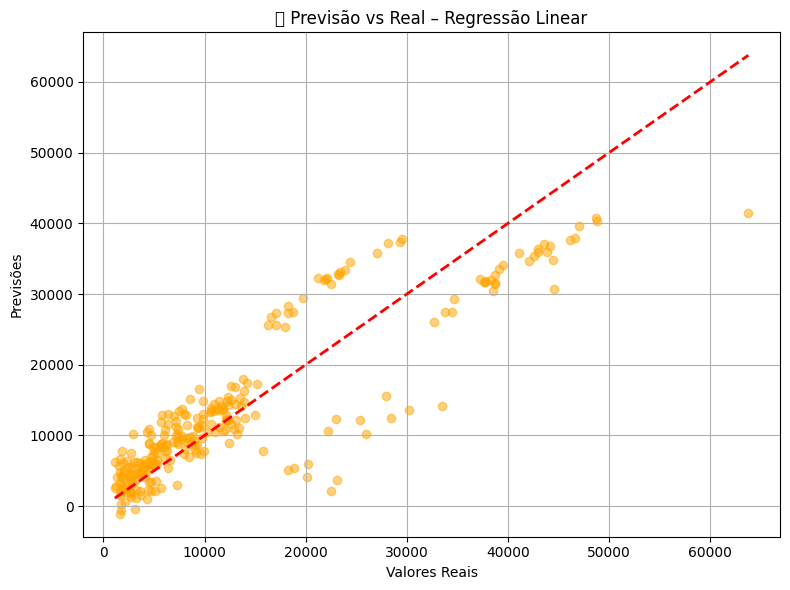

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reais")
plt.ylabel("Previs√µes")
plt.title("üîπ Previs√£o vs Real ‚Äì Regress√£o Linear")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-19-a0f3bebeefd6>:10: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


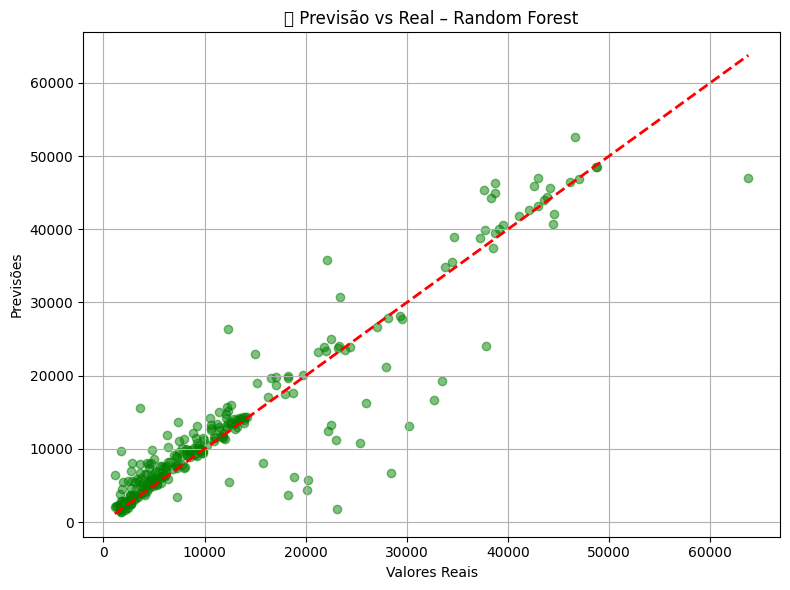

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha ideal
plt.xlabel("Valores Reais")
plt.ylabel("Previs√µes")
plt.title("üîπ Previs√£o vs Real ‚Äì Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-11-b52716ab8430>:10: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


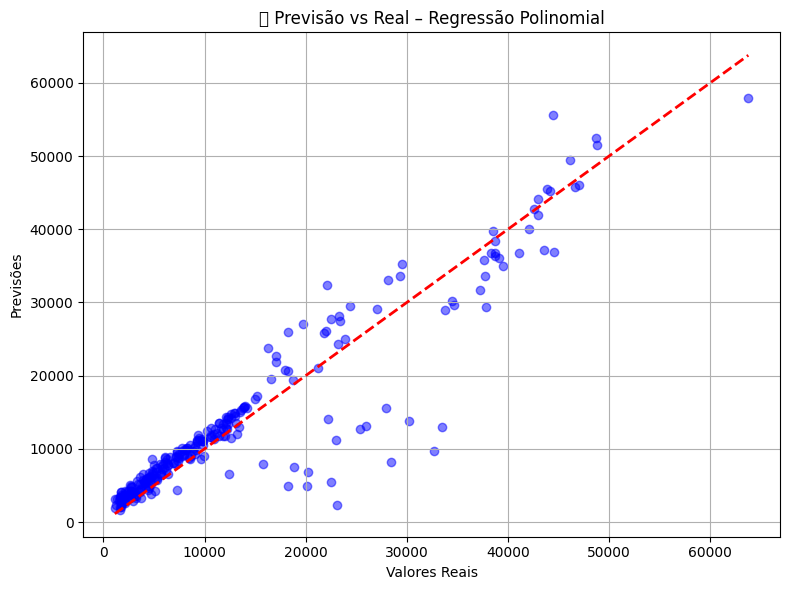

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha de refer√™ncia
plt.xlabel("Valores Reais")
plt.ylabel("Previs√µes")
plt.title("üîπ Previs√£o vs Real ‚Äì Regress√£o Polinomial")
plt.grid(True)
plt.tight_layout()
plt.show()


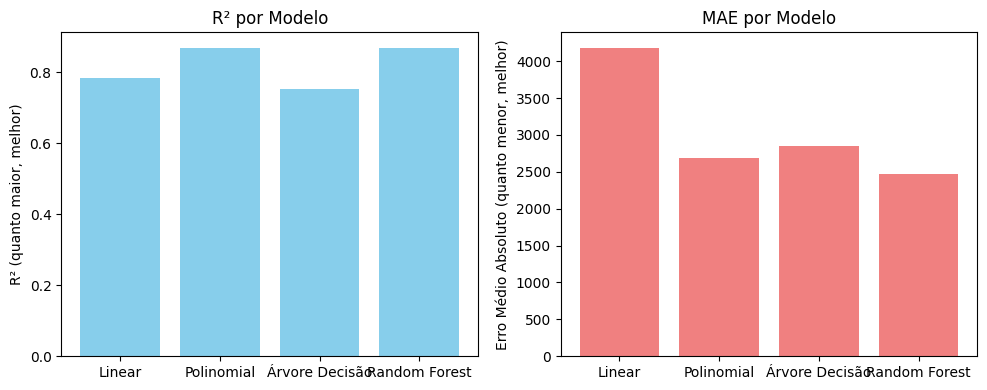

In [ ]:
import matplotlib.pyplot as plt

# R¬≤ de cada modelo
r2_scores = {
    'Linear': 0.7835929767120724,
    'Polinomial': 0.8692975322069121,
    '√Årvore Decis√£o': 0.7534676355524017,
    'Random Forest': 0.8683655116929723
}

# MAE de cada modelo
mae_scores = {
    'Linear': 4181.194473753638,
    'Polinomial': 2685.3448170096553,
    '√Årvore Decis√£o': 2854.5474588395523,
    'Random Forest': 2470.5008867561573
}

# Plotar R¬≤
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.title('R¬≤ por Modelo')
plt.ylabel('R¬≤ (quanto maior, melhor)')

# Plotar MAE
plt.subplot(1, 2, 2)
plt.bar(mae_scores.keys(), mae_scores.values(), color='lightcoral')
plt.title('MAE por Modelo')
plt.ylabel('Erro M√©dio Absoluto (quanto menor, melhor)')

plt.tight_layout()
plt.show()

#Observa√ß√µes e conclus√£o

Analisando os dados e os graficos eu considerei incluir a coluna region como dado de entrada, pensando que me cada regi√£o pode haver diferen√ßas culturais, alimentares e clim√°ticas... Podendo interfir no valor ao contratar o conv√™nio m√©dico.

A partir disso, testei diferentes modelos e combina√ß√µes de vari√°veis. Os melhores desempenhos foram da Regress√£o Polinomial e do Random Forest, usando o conjunto: age, bmi, smoker, children, region.

Voltei ao in√≠cio do notebook e, ao analisar o histograma de charges, percebi que a maioria dos custos est√° concentrada entre R$ 5 mil e R$ 15 mil. A partir desse ponto, a frequ√™ncia dos valores diminui, mas os valores continuam aumentando, chegando a ultrapassar R$ 60 mil. Esses valores mais altos parecem estar relacionados a casos espec√≠ficos, como pessoas com idade mais avan√ßada (age), com filhos (children) e com IMC elevado (bmi).

#Testando os graficos de dispers√£o

Quando testei a regress√£o linear (por desencargo de consci√™ncia), ficou claro no gr√°fico que, √† medida que o custo aumenta, os pontos come√ßam a se espalhar mais. Eles n√£o ficam exatamente longe da linha, mas parece que o modelo est√° tentando ‚Äúfingir que t√° certo‚Äù ‚Äî como se dissesse: ‚Äút√° tudo mais ou menos‚Äù, mas na verdade est√° errando nos extremos.

J√° no gr√°fico do Random Forest, senti uma certa ‚Äúbagun√ßa visual‚Äù muitos pontos verdes aglomerados na mesma faixa horizontal de custo, o que indica que o modelo deu a mesma previs√£o para casos diferentes. Al√©m disso, h√° pontos espalhados que n√£o acompanham t√£o bem a linha parece que algumas previs√µes foram meio ‚Äújogadas‚Äù, sem muita sensibilidade ao caso espec√≠fico.

Agora, olhando o gr√°fico da Regress√£o Polinomial, √© vis√≠vel que o modelo acompanha melhor a linha ideal. Os pontos est√£o mais bem distribu√≠dos, ‚Äúse esfor√ßando‚Äù para ficar pr√≥ximos da diagonal. H√° sim alguns pontos afastados, como em qualquer modelo, mas em menor quantidade e com melhor alinhamento geral.

#Conclus√£o

Entendi que, para um dataset onde existem casos extremos causados por combina√ß√µes espec√≠ficas de fatores, os modelos como Regress√£o Linear e at√© o Random Forest n√£o lidam t√£o bem. Eles acabam subestimando os valores altos ou superestimando os baixos, tentando equilibrar tudo e com isso, n√£o capturam bem os picos reais.

A Regress√£o Polinomial, por outro lado, consegue acompanhar a curva de crescimento e representar melhor a progress√£o dos custos nesses casos, mostrando um comportamento mais fiel e previs√µes mais coerentes.